In [2]:
import sklearn

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\hyu\AppData\Local\Continuum\anaconda3\envs\victrack\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [3]:
import os
import tarfile
from six.moves import urllib
from pathlib import Path
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



In [2]:
str(HOUSING_URL)

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
df = load_housing_data()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E311FCC438>,
      dtype=object)

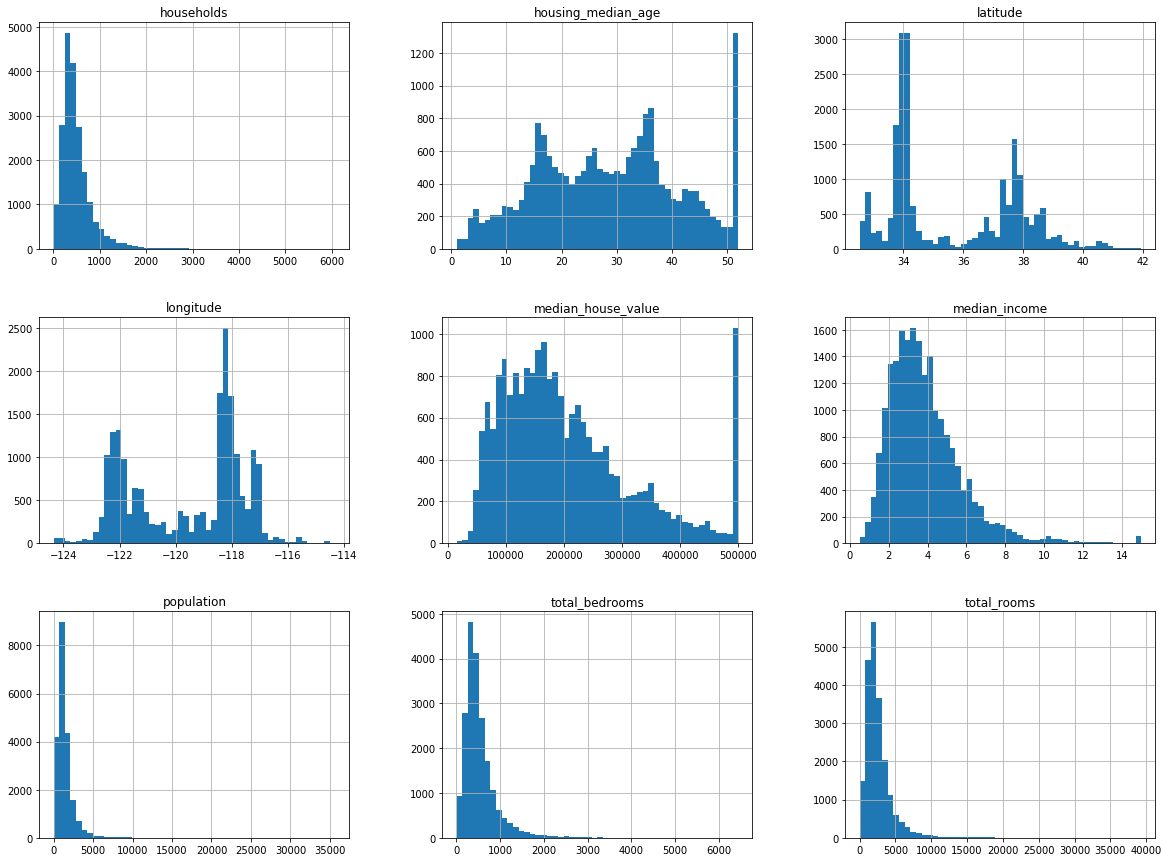

In [10]:
df.hist(bins=50,figsize=(20,15))


## split test dataset


In [11]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = split_train_test(df,0.2)
print(f'{len(train_set)} train + {len(test_set)} test')

16512 train + 4128 test


In [13]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio

def split_train_test_by_id(data,test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
housing_with_id = df.reset_index()  # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

如果使用行索引作为唯一识别码，你需要保证新数据都放到现有数据的尾部，且没有行被删除。如果做不到，则可以用最稳定的特征来创建唯一识别码。例如，一个区的维度和经度在几百万年之内是不变的，所以可以将两者结合成一个 ID：

In [15]:
housing_with_id['id'] = df['longitude']*1000 + df['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id,0.2, 'id')

In [17]:
import sklearn

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\hyu\AppData\Local\Continuum\anaconda3\envs\victrack\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

Scikit-Learn 提供了一些函数，可以用多种方式将数据集分割成多个子集。最简单的函数是train_test_split，它的作用和之前的函数split_train_test很像，并带有其它一些功能。首先，它有一个random_state参数，可以设定前面讲过的随机生成器种子；第二，你可以将种子传递给多个行数相同的数据集，可以在相同的索引上分割数据集（这个功能非常有用，比如你的标签值是放在另一个DataFrame里的）：

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\hyu\AppData\Local\Continuum\anaconda3\envs\victrack\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

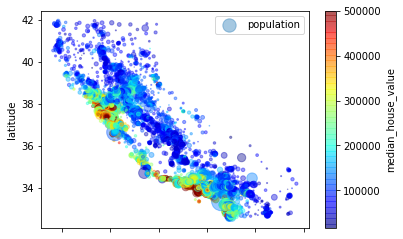

In [61]:
df.plot(kind='scatter',
        x='longitude',
        y='latitude',
        alpha=0.4,
       s=df['population']/100,
       label="population",
       c="median_house_value",
       cmap=plt.get_cmap("jet"),
       colorbar=True)

In [59]:
corr_matrix = df.corr()

In [60]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

另一种检测属性间相关系数的方法是使用 Pandas 的scatter_matrix函数，它能画出每个数值属性对每个其它数值属性的图。因为现在共有 11 个数值属性，你可以得到11 ** 2 = 121张图，在一页上画不下，所以只关注几个和房价中位数最有可能相关的属性（图 2-15）：


In [68]:
from pandas.plotting import scatter_matrix

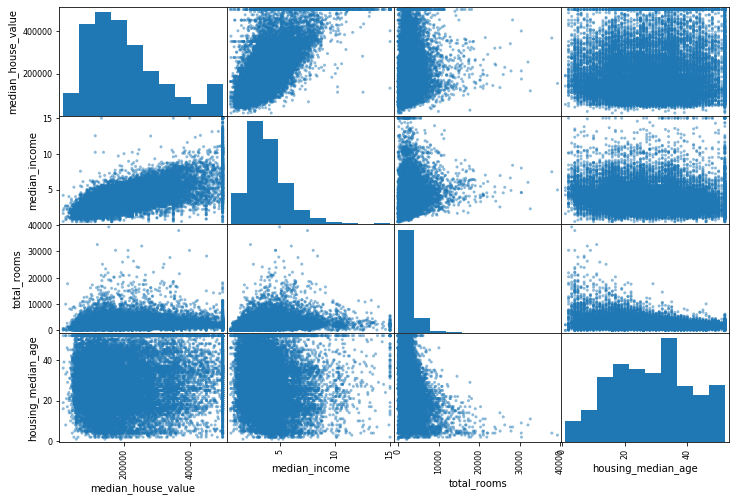

In [70]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

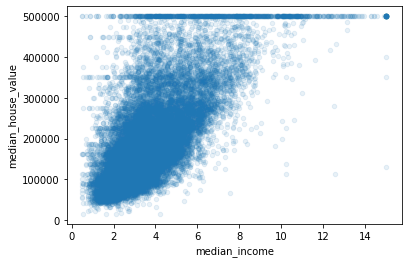

In [71]:
df.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.1)

## 属性组合试验

希望前面的一节能教给你一些探索数据、发现规律的方法。你发现了一些数据的巧合，需要在给算法提供数据之前，将其去除。你还发现了一些属性间有趣的关联，特别是目标属性。你还注意到一些属性具有长尾分布，因此你可能要将其进行转换（例如，计算其log对数）。当然，不同项目的处理方法各不相同，但大体思路是相似的。

给算法准备数据之前，你需要做的最后一件事是尝试多种属性组合。例如，如果你不知道某个街区有多少户，该街区的总房间数就没什么用。你真正需要的是每户有几个房间。相似的，总卧室数也不重要：你可能需要将其与房间数进行比较。每户的人口数也是一个有趣的属性组合。让我们来创建这些新的属性：



In [72]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

现在，再来看看相关矩阵：

In [73]:
corr_matrix = df.corr()

In [75]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64